 # C'est un projet en collaboration avec les biologistes et le but du Tp est de faire une prediction sur les données des bio.

### Ce projet est mené par Taleb Nesrine,Souidi Mohamed Said et Gaya Yadel.

In [3]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [1]:
#Nous avons dans un premiers temps importer toutes les bibliotheques nécessaires
import sklearn
from sklearn import datasets
import numpy as np
import pandas as pd
import seaborn as sb
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import warnings

In [ ]:
#Nous avons importé les données du fichier Excel 
data = pd.read_excel('D:\l3\ia\projet\locomotion.xlsx')
data.head()

In [ ]:
#On nettoie les données ie année, n°groupe,noms binomes,n° Tp qu'on doitsupprimer
data.drop(data.columns[[0,1,2,3]],axis=1,inplace=True) 
#data = data.drop(['année','Numero de groupe','noms binôme','numéro de TP'],axis=1)
data.head()

In [ ]:
#On definit les caracteres X et Y pour representer les données
#Nous nous sommes inspiré du Tp Titanic 
caracY=data['minute 8']
caracX=data[['minute 9','minute 10']]
Y=caracY.to_numpy()
X=caracX.to_numpy()
caracX.head()

([], [])

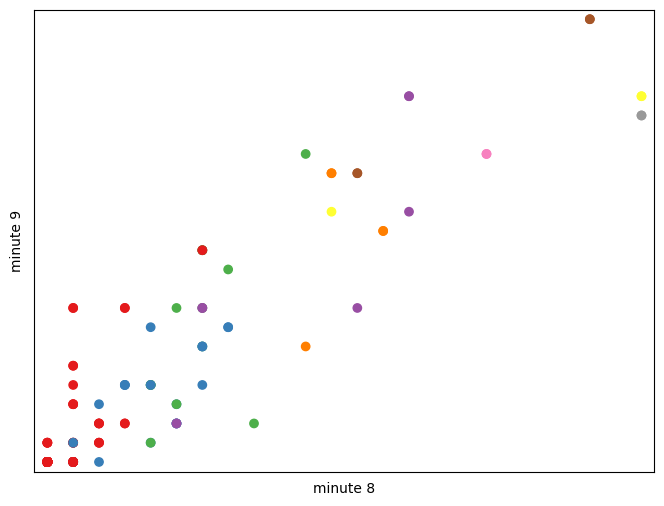

In [56]:
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
plt.figure(0, figsize=(8, 6))
plt.clf()
plt.scatter(X[:, 0], X[:, 1],c=Y,cmap=plt.cm.Set1)
plt.xlabel('minute 8')
plt.ylabel('minute 9')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

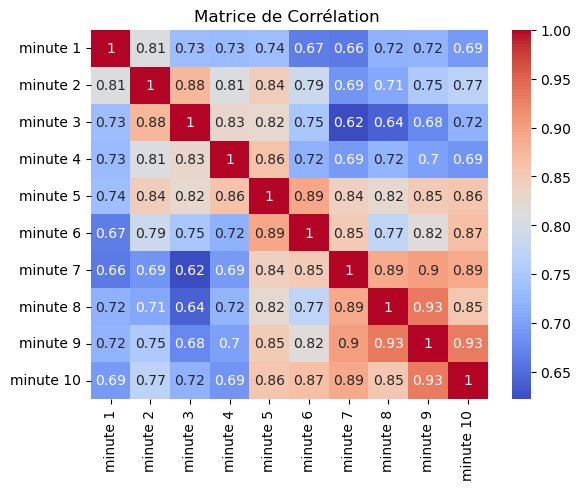

In [35]:
#On fait des statistiques(analyse univariée et une analyse bivariée)
#Nous avons egalement effectué ce travail sur Jamovi pour mieux visualiser les données
# On calcule alors la matrice de corrélation
correlation_matrix = data.corr()

# On Visualise la matrice de corrélation avec seaborn
import seaborn as sns

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matrice de Corrélation ')
plt.show()


In [40]:
# On calcule les moyennes de X et de y
mean_X = np.mean(X)
mean_Y = np.mean(Y)

# On affiche les moyennes  #nous nous sommes inspiré du Tp Regression Linéaire
print("Moyenne de X :", mean_X)
print("Moyenne de y :", mean_Y)

Moyenne de X : 2.8585858585858586
Moyenne de y : 2.8434343434343434


In [66]:
print("Dimensions de X :", X.shape)
print("Dimensions de Y :", Y.shape)

# On ajuste les dimensions de Y pour correspondre à celles de X
Y = np.resize(Y, X.shape)

# On calcule la covariance cov(X, Y)
covariance_XY = np.cov(X.squeeze(), Y.squeeze(), rowvar=False)

# On afficher la covariance
print("Covariance entre X et Y :\n", covariance_XY)

Dimensions de X : (396, 1)
Dimensions de Y : (396, 1)
Covariance entre X et Y :
 [[26.51666027  1.92210715]
 [ 1.92210715 25.83365299]]


In [42]:
# On calcule la variance de X
variance_X = np.var(X)

# On affiche la variance de X
print("Variance de X :", variance_X)

Variance de X : 26.449699010305075


In [68]:
#Pour en déduire les coefficients a et b
# Calculer le coefficient a
a = covariance_XY / variance_X

# Calculer le coefficient b
b = mean_Y - a * mean_X

# Afficher les coefficients a et b
print("Coefficient a :", a)
print("Coefficient b :", b)

Coefficient a : [[1.00253165 0.07267028]
 [0.07267028 0.97670877]]
Coefficient b : [[-0.02238844  2.6357001 ]
 [ 2.6357001   0.05142847]]


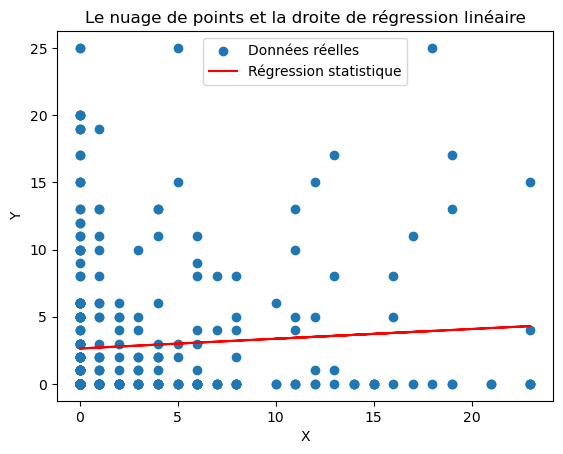

In [72]:
# Dessiner le nuage de points et la droite de régression
plt.scatter(X, Y, label='Données réelles')
plt.plot(X, a * X + b, color='red', label='Régression statistique')
plt.title('Le nuage de points et la droite de régression linéaire')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [75]:
#On fait du Clustering et le but et de pouvoir représenter les données de manière a ce que les bios puissent en deduire une analyse
X = data[['minute 1', 'minute 2', 'minute 3','minute 4','minute 5','minute 6','minute 7','minute 8','minute 9','minute 10']]

# On crée un objet KMeans avec le nombre de clusters désiré
nombre_clusters = 10  # Par exemple, 3 clusters
kmeans = KMeans(n_clusters=nombre_clusters, random_state=42)

# on entraîne le modèle sur vos données
kmeans.fit(X)

# on obtient alors les étiquettes de cluster pour chaque point de données
labels = kmeans.labels_

# on obtient finalement les centres de cluster (centroids)
centroids = kmeans.cluster_centers_

  Solution  minute 1  minute 2  minute 3  minute 4  minute 5  minute 6  \
0     Ctrl         6        13        14        18        17         9   
1     Ctrl        12         4         7         8         7         5   
2     Ctrl         8         9        10         7         9         8   
3     Ctrl         5        10         5        11        12         5   
4     Ctrl         7         3         0         0         0         0   

   minute 7  minute 8  minute 9  minute 10  Cluster  
0        13         6        10         16        1  
1         3         8         6          6        3  
2        11         9        12          8        3  
3         3         8         8          2        3  
4         0         0         0          0        0  


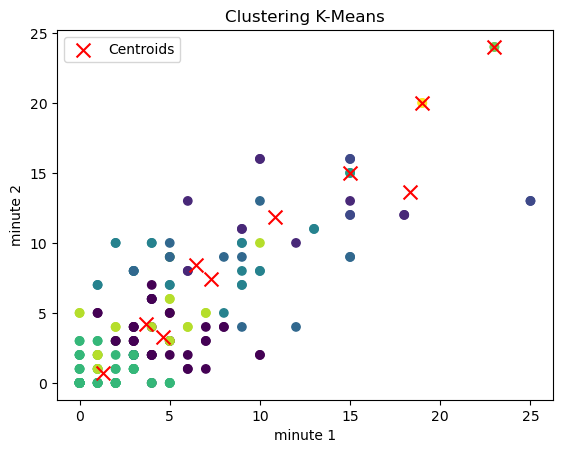

In [76]:
# On ajoute les étiquettes de cluster à votre DataFrame
data['Cluster'] = labels

# on affiche les premières lignes avec les étiquettes de cluster
print(data.head())
# Pour visualiser les données un nuage de points coloré par cluster

plt.scatter(X['minute 1'], X['minute 2'], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=100, c='red', label='Centroids')
plt.xlabel('minute 1')
plt.ylabel('minute 2')
plt.title('Clustering K-Means')
plt.legend()
plt.show()

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [10]:
X = data.drop(columns=["Solution"])
y = data["Solution"]

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=True)

model = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=1000,solver="adam",activation="relu")
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.38461538461538464


In [ ]:
#stereotypies

In [ ]:
combiné = 'D:\l3\ia\projet\stereotypies.xlsx'

# nous allons etudier sur le dossier 2023-2024
onglet = '2023-2024'

# On importe le fichier Excel en spécifiant le fichier
data = pd.read_excel(combiné, sheet_name=onglet)

# et on finit par afficher les premières lignes pour vérification
print(data.head())

In [ ]:
data.drop(data.columns[[0,1,2,3]],axis=1,inplace=True) 
data.head()

In [ ]:
#On definit les caracteres X et Y pour representer les données
#Nous nous sommes inspiré du Tp Titanic
caracX=data['stereotypies (en sec)']
caracY=data[['stereotypies (en nb)']]
Y=caracY.to_numpy()
X=caracX.to_numpy()
caracX.head()

In [ ]:
X = np.array([[1, 2], [3, 4], [5, 6]])  # Un tableau bidimensionnel avec 3 lignes et 2 colonnes
Y = np.array([0, 1, 0])  # Exemple de valeurs de Y

x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

plt.figure(0, figsize=(8, 6))
plt.clf()
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Set1)
plt.xlabel('stereotypies (en sec)')
plt.ylabel('stereotypies (en nb)')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [ ]:
#la matrice de correlation est mieux adapté de la faire sur jamovi pour des données plus exactes
# matrice de corrélation
matrice_corr = data.corr()

# Afficher la matrice de corrélation
print("Matrice de corrélation :")
print(matrice_corr)

Nous avons trouvé que c'est mieux de faire des predictions sur jamovi pour divisier en stereotypies en nb et en sec et faire des predictions et les analyser 
Nous nous sommes alors concentré sur le fichier 2022 pour le script python

In [ ]:
#Nous avons importé les données du fichier Excel 
data = pd.read_excel('D:\l3\ia\projet\stereotypies.xlsx')
data.head()

In [ ]:
data.drop(data.columns[[0,1,2,3]],axis=1,inplace=True) 
data.head()

In [ ]:
caracY=data['minute 1']
caracX=data[['minute 20','SOMME']]
Y=caracY.to_numpy()
X=caracX.to_numpy()
caracX.head()

In [ ]:
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
plt.figure(0, figsize=(8, 6))
plt.clf()
plt.scatter(X[:, 0], X[:, 1],c=Y,cmap=plt.cm.Set1)
plt.xlabel('minute 1')
plt.ylabel('minute 20')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

In [ ]:
# On calcule alors la matrice de corrélation
correlation_matrix = data.corr()

# On Visualise la matrice de corrélation avec seaborn
import seaborn as sns

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matrice de Corrélation ')
plt.show()

In [ ]:
# On calcule les moyennes de X et de y
mean_X = np.mean(X)
mean_Y = np.mean(Y)

# On affiche les moyennes  #nous nous sommes inspiré du Tp Regression Linéaire
print("Moyenne de X :", mean_X)
print("Moyenne de y :", mean_Y)

In [ ]:
print("Dimensions de X :", X.shape)
print("Dimensions de Y :", Y.shape)

# On ajuste les dimensions de Y pour correspondre à celles de X
Y = np.resize(Y, X.shape)

# On calcule la covariance cov(X, Y)
covariance_XY = np.cov(X.squeeze(), Y.squeeze(), rowvar=False)

# On afficher la covariance
print("Covariance entre X et Y :\n", covariance_XY)

In [ ]:
# On calcule la variance de X
variance_X = np.var(X)

# On affiche la variance de X
print("Variance de X :", variance_X)

In [ ]:
#Pour en déduire les coefficients a et b
# Calculer le coefficient a
a = covariance_XY / variance_X

# Calculer le coefficient b
b = mean_Y - a * mean_X

# Afficher les coefficients a et b
print("Coefficient a :", a)
print("Coefficient b :", b)

In [ ]:
from sklearn.linear_model import LinearRegression
# on transforme les tableaux X et Y en tableaux à une seule colonne
X = X.reshape(-1, 1)
Y = Y.reshape(-1, 1)

# On crée un modèle de régression linéaire
model = LinearRegression()

# On adapte le modèle aux données
model.fit(X, Y)

# On obtient les coefficients de la droite de régression
a = model.coef_[0][0]
b = model.intercept_[0]

# Enfin on le nuage de points et la droite de régression
plt.scatter(X, Y, label='Données réelles')
plt.plot(X, a * X + b, color='red', label='Régression linéaire')
plt.title('Nuage de points avec la droite de régression linéaire')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

warnings.filterwarnings("ignore", category=UserWarning, message="X does not have valid feature names*")

data = pd.read_csv("Iris.csv")

X = data.drop(columns=["Id", "Species"])
y = data["Species"]

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

def predict_species(sepal_length, sepal_width, petal_length, petal_width):
    features = [[sepal_length, sepal_width, petal_length, petal_width]]
    predicted_class = model.predict(features)
    predicted_species = label_encoder.inverse_transform(predicted_class)
    return predicted_species[0]

sepal_length = 5.1
sepal_width = 3.5
petal_length = 1.4
petal_width = 0.2
predicted_species = predict_species(sepal_length, sepal_width, petal_length, petal_width)
print("Predicted Species:", predicted_species)